In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# import sys
# print(sys.version)
# print(sys.path)
import shapely
import geopandas as gpd
    #import descartes
import pandas as pd
#import scipy.stats


In [3]:
import streamlit as st
import numpy as np

In [2]:
import contextily as cx

In [3]:
df=pd.read_csv('CalHHSData.csv',dtype={'BHIndicator':'object'})


In [5]:
print(df.dtypes)

X                    float64
Y                    float64
OBJECTID               int64
ManagedCarePlan       object
SubNetwork            object
PlanCode               int64
RecordType            object
NPI                  float64
FacilityName          object
LastName              object
FirstName             object
Taxonomy              object
MCNAProviderGroup     object
MCNAProviderType      object
FacilityType          object
LicensureType         object
PrimaryCare           object
Specialist            object
SeesChildren          object
Telehealth            object
BHIndicator           object
Address               object
Address2              object
City                  object
State                 object
ZIP                  float64
ZIP_4                float64
Longitude            float64
Latitude             float64
DHCSCountyCode         int64
FIPSCd               float64
County                object
dtype: object


In [46]:
print(df.columns[20])

BHIndicator


In [34]:
df.head()

,X,Y,OBJECTID,ManagedCarePlan,SubNetwork,PlanCode,RecordType,NPI,FacilityName,LastName,...,Address2,City,State,ZIP,ZIP_4,Longitude,Latitude,DHCSCountyCode,FIPSCd,County
0,-122.173370556,37.7692257080001,1,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1811955438,Ucsf Sfgh Medical Group,Gupta,...,Ste 200,Oakland,CA,94605,NaN,-122.173370556074,37.7692257083964,01,06001,Alameda
1,-122.225446218,37.7783273200001,2,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1811967920,Santa Clara Valley Medical Center,Nguyen,...,Ste E,Oakland,CA,94601,NaN,-122.225446217843,37.7783273197242,01,06001,Alameda
2,-121.937121,37.3160785000001,3,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1811970973,Scvmc Physician Services,Dai Biller,...,NaN,San Jose,CA,95128,NaN,-121.937121,37.3160784998271,43,06085,Santa Clara
3,-121.931793041,37.314261,4,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1811970973,Santa Clara Valley Medical Center,Dai Biller,...,NaN,San Jose,CA,95128,NaN,-121.931793041434,37.314261,43,06085,Santa Clara
4,-122.42156897,37.7861043880001,5,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1811937980,Northern California Anesthesia Physicians,Goodman,...,NaN,San Francisco,CA,94109,NaN,-122.421568970107,37.7861043882798,38,06075,San Francisco


In [8]:
dfIV=df[df['County']=='Imperial']
dfIV.head()

,X,Y,OBJECTID,ManagedCarePlan,SubNetwork,PlanCode,RecordType,NPI,FacilityName,LastName,...,Address2,City,State,ZIP,ZIP_4,Longitude,Latitude,DHCSCountyCode,FIPSCd,County
121396,-115.577768,32.756256,121423,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.023061e+09,NASRIN MANI,MANI,...,NaN,EL CENTRO,CA,92243.0,NaN,-115.577768,32.756256,13,6025.0,Imperial
121893,-115.568541,32.781449,121920,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.063415e+09,UCSD EMERG PHYSICIANS,CURRAN,...,NaN,EL CENTRO,CA,92243.0,NaN,-115.568541,32.781449,13,6025.0,Imperial
148380,-115.568541,32.781449,148407,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.053339e+09,ANUSHIRVAN MINOKADEH,MINOKADEH,...,NaN,EL CENTRO,CA,92243.0,NaN,-115.568541,32.781449,13,6025.0,Imperial
149409,-115.573904,32.792739,149436,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.558301e+09,LA JOLLA SPINE INSTITUTE MED GRP INC,BERGEN,...,NaN,EL CENTRO,CA,92243.0,NaN,-115.573904,32.792739,13,6025.0,Imperial
149862,-115.553704,32.958090,149889,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.598980e+09,RADY CHILDRENS SPECIALISTS SAN DIEGO MED FNDTN,Thangarajah,...,NaN,BRAWLEY,CA,92227.0,NaN,-115.553704,32.958090,13,6025.0,Imperial


In [34]:
dfIV ['ManagedCarePlan'].unique()

array(['Blue Shield of California Promise',
       'California Health and Wellness Plan',
       'CENTRAL CALIFORNIA ALLIANCE FOR HEALTH',
       'Community Health Group Partnership Plan',
       'Health Plan of San Joaquin', 'Inland Empire Health Plan',
       'GOLD COAST HEALTH PLAN', 'Aetna Better Health',
       'Kern Family Health Care',
       'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN',
       'Partnership Health Plan of CA', 'San Francisco Health Plan'],
      dtype=object)

In [76]:
dfIV['SubNetwork'].unique()

array(['Blue Shield of California Promise',
       'California Health and Wellness Plan', 'CCAH_7',
       'Community Health Group Partnership Plan', 'Carelon',
       'Inland Empire Health Plan', 'GOLD COAST HEALTH PLAN',
       'Aetna Better Health', 'PROSPECT MEDICAL GROUP INC',
       'COMMUNITY CARE IPA LLC', 'NIVANO PHYSICIANS INC',
       'Kern Family Health Care', 'MOLINA MEDI-CAL', 'COMMUNITY CARE IPA',
       'Partnership Health Plan of CA',
       'SAN FRANCISCO HEALTH PLAN - NETWORK'], dtype=object)

In [15]:
setMCP={'Blue Shield of California Promise',
       'California Health and Wellness Plan',
       'CENTRAL CALIFORNIA ALLIANCE FOR HEALTH',
       'Community Health Group Partnership Plan',
       'Health Plan of San Joaquin', 'Inland Empire Health Plan',
       'GOLD COAST HEALTH PLAN', 'Aetna Better Health',
       'Kern Family Health Care',
       'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN',
       'Partnership Health Plan of CA', 'San Francisco Health Plan'}
setSN={'Blue Shield of California Promise',
       'California Health and Wellness Plan', 'CCAH_7',
       'Community Health Group Partnership Plan', 'Carelon',
       'Inland Empire Health Plan', 'GOLD COAST HEALTH PLAN',
       'Aetna Better Health', 'PROSPECT MEDICAL GROUP INC',
       'COMMUNITY CARE IPA LLC', 'NIVANO PHYSICIANS INC',
       'Kern Family Health Care', 'MOLINA MEDI-CAL', 'COMMUNITY CARE IPA',
       'Partnership Health Plan of CA',
       'SAN FRANCISCO HEALTH PLAN - NETWORK'}
setMCP.intersection(setSN)

{'Aetna Better Health',
 'Blue Shield of California Promise',
 'California Health and Wellness Plan',
 'Community Health Group Partnership Plan',
 'GOLD COAST HEALTH PLAN',
 'Inland Empire Health Plan',
 'Kern Family Health Care',
 'Partnership Health Plan of CA'}

In [31]:
ManagedCarePlan_counts = dfIV.groupby('ManagedCarePlan').size().reset_index(name='Count')
print(ManagedCarePlan_counts)


                                 ManagedCarePlan  Count
0                            Aetna Better Health    182
1              Blue Shield of California Promise    139
2         CENTRAL CALIFORNIA ALLIANCE FOR HEALTH     18
3            California Health and Wellness Plan   1368
4        Community Health Group Partnership Plan      7
5                         GOLD COAST HEALTH PLAN     40
6                     Health Plan of San Joaquin     14
7                      Inland Empire Health Plan     12
8                        Kern Family Health Care     34
9   MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN   1595
10                 Partnership Health Plan of CA   2169
11                     San Francisco Health Plan      9


In [32]:
subnetworks_by_plan = dfIV.groupby('ManagedCarePlan')['SubNetwork'].unique()


In [33]:
for plan, subnetworks in subnetworks_by_plan.items():
    print(f"Managed Care Plan: {plan}")
    print(f"SubNetworks: {', '.join(subnetworks)}\n")

Managed Care Plan: Aetna Better Health
SubNetworks: Aetna Better Health, PROSPECT MEDICAL GROUP INC, COMMUNITY CARE IPA LLC, NIVANO PHYSICIANS INC

Managed Care Plan: Blue Shield of California Promise
SubNetworks: Blue Shield of California Promise

Managed Care Plan: CENTRAL CALIFORNIA ALLIANCE FOR HEALTH
SubNetworks: CCAH_7

Managed Care Plan: California Health and Wellness Plan
SubNetworks: California Health and Wellness Plan

Managed Care Plan: Community Health Group Partnership Plan
SubNetworks: Community Health Group Partnership Plan

Managed Care Plan: GOLD COAST HEALTH PLAN
SubNetworks: GOLD COAST HEALTH PLAN

Managed Care Plan: Health Plan of San Joaquin
SubNetworks: Carelon

Managed Care Plan: Inland Empire Health Plan
SubNetworks: Inland Empire Health Plan

Managed Care Plan: Kern Family Health Care
SubNetworks: Kern Family Health Care

Managed Care Plan: MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN
SubNetworks: MOLINA MEDI-CAL, COMMUNITY CARE IPA

Managed Care Plan: Partners

In [ ]:
#Look at how many doctors are in healthcare where the size of the dot represents the number of doctors in a facility

In [16]:
df['County'].unique()

array(['Alameda', 'Santa Clara', 'San Francisco', 'Fresno', 'Tulare',
       'Kings', 'Glenn', 'Plumas', 'Tehama', 'Contra Costa', 'Butte',
       'Sutter', 'Nevada', 'El Dorado', 'Sacramento', 'Placer', 'Yuba',
       'Sierra', 'Colusa', 'San Benito', 'Mariposa', 'Tuolumne',
       'Calavaras', 'Alpine', 'Madera', 'San Diego ', 'Imperial',
       'Los Angeles', 'Riverside', 'Orange', 'San Joaquin', 'Stanislaus',
       'Yolo', 'Solano', 'Mono', 'Amador', 'Shasta', 'Kern',
       'San Bernardino', 'Inyo', 'Ventura', 'Lassen', 'San Mateo',
       'Santa Barbara', 'Merced', 'Lake', 'Sonoma', 'Napa', 'Siskiyou',
       'Mendocino', 'Santa Cruz', 'Monterey', nan, 'Modoc', 'Humboldt',
       'Marin', 'San Luis Obispo', 'Del Norte', 'Trinity'], dtype=object)

In [18]:
dfSD=df[df['County']=='San  Diego']
dfSD

In [4]:
dfTax=pd.read_csv('Taxonomy.csv')

In [4]:
dfIVED=dfIV[dfIV['MCNAProviderType']=='Other']

NameError: name 'dfIV' is not defined

In [ ]:
#Make a user input where they type the MCNAProviderType and on a map it lists where those are on the Valley

In [6]:
taxonomy_subset = dfTax[['Code', 'Specialization','Classification','Definition','Display Name']]

In [7]:
merged_df = pd.merge(df, taxonomy_subset, 
                     how='left',  
                     left_on='Taxonomy', 
                     right_on='Code')
merged_df = merged_df.rename(columns={'Specialization': 'ProviderSpecialization'})

In [58]:
from IPython.display import display
display(merged_df)

,X,Y,OBJECTID,ManagedCarePlan,SubNetwork,PlanCode,RecordType,NPI,FacilityName,LastName,...,State,ZIP,ZIP_4,Longitude,Latitude,DHCSCountyCode,FIPSCd,County,Code,ProviderSpecialization
0,-122.173371,37.769226,1,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1.811955e+09,Ucsf Sfgh Medical Group,Gupta,...,CA,94605.0,NaN,-122.173371,37.769226,1,6001.0,Alameda,207T00000X,NaN
1,-122.225446,37.778327,2,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1.811968e+09,Santa Clara Valley Medical Center,Nguyen,...,CA,94601.0,NaN,-122.225446,37.778327,1,6001.0,Alameda,207R00000X,NaN
2,-121.937121,37.316079,3,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1.811971e+09,Scvmc Physician Services,Dai Biller,...,CA,95128.0,NaN,-121.937121,37.316078,43,6085.0,Santa Clara,207V00000X,NaN
3,-121.931793,37.314261,4,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1.811971e+09,Santa Clara Valley Medical Center,Dai Biller,...,CA,95128.0,NaN,-121.931793,37.314261,43,6085.0,Santa Clara,207V00000X,NaN
4,-122.421569,37.786104,5,ANTHEM BLUE CROSS PARTNERSHIP PLAN,ANTHEM BLUE CROSS PARTNERSHIP PLAN,340,Provider,1.811938e+09,Northern California Anesthesia Physicians,Goodman,...,CA,94109.0,NaN,-122.421569,37.786104,38,6075.0,San Francisco,207L00000X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3268554,-118.531230,34.169794,3268868,SCAN Health Plan,Connections,200,Hospital,1.821251e+09,PROVIDENCE CEDARS-SINAI TARZANA MEDICAL CENTER,NaN,...,CA,91356.0,91356.0,-118.531230,34.169794,19,6037.0,Los Angeles,282N00000X,NaN
3268555,-118.265812,34.053489,3268869,SCAN Health Plan,Connections,200,Provider,1.821451e+09,DOUGLAS MATSUNAGA,MATSUNAGA,...,CA,90017.0,4886.0,-118.265812,34.053489,19,6037.0,Los Angeles,207W00000X,NaN
3268556,-118.163439,33.860140,3268870,SCAN Health Plan,Connections,200,Provider,1.821191e+09,SULABHA DAVE,DAVE,...,CA,90805.0,4426.0,-118.163439,33.860140,19,6037.0,Los Angeles,2085R0001X,Radiation Oncology
3268557,-118.266212,34.035963,3268871,SCAN Health Plan,Connections,200,Provider,1.821382e+09,SAMI ALI,ALI,...,CA,90015.0,3070.0,-118.266212,34.035963,19,6037.0,Los Angeles,207RH0000X,Hematology


In [8]:
dfIV=merged_df[merged_df['County']=='Imperial']
dfSD=merged_df[merged_df['County']=='San Diego ']
dfRV=merged_df[merged_df['County']=='Riverside']

In [15]:
dfIV.to_csv('IVMCProviderList.csv', index=False)
dfSD.to_csv('SDProviderList.csv', index=False)
dfRV.to_csv('RVProviderList.csv', index=False)

In [14]:
dfIV=dfIV[['X','Y','OBJECTID','ManagedCarePlan','SubNetwork','PlanCode', 'RecordType','NPI','FacilityName','LastName','FirstName','Taxonomy','Classification','ProviderSpecialization','Definition','Display Name','MCNAProviderGroup','MCNAProviderType','FacilityType','LicensureType','PrimaryCare','Specialist','SeesChildren','Telehealth','BHIndicator','Address','Address2','City','State','ZIP','ZIP_4','Longitude','Latitude','DHCSCountyCode','FIPSCd','County']]

In [11]:
dfSD=dfSD[['X','Y','OBJECTID','ManagedCarePlan','SubNetwork','PlanCode', 'RecordType','NPI','FacilityName','LastName','FirstName','Taxonomy','Classification','ProviderSpecialization','Definition','Display Name','MCNAProviderGroup','MCNAProviderType','FacilityType','LicensureType','PrimaryCare','Specialist','SeesChildren','Telehealth','BHIndicator','Address','Address2','City','State','ZIP','ZIP_4','Longitude','Latitude','DHCSCountyCode','FIPSCd','County']]
dfRV=dfRV[['X','Y','OBJECTID','ManagedCarePlan','SubNetwork','PlanCode', 'RecordType','NPI','FacilityName','LastName','FirstName','Taxonomy','Classification','ProviderSpecialization','Definition','Display Name','MCNAProviderGroup','MCNAProviderType','FacilityType','LicensureType','PrimaryCare','Specialist','SeesChildren','Telehealth','BHIndicator','Address','Address2','City','State','ZIP','ZIP_4','Longitude','Latitude','DHCSCountyCode','FIPSCd','County']]

In [16]:
import folium

In [11]:
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)
for index, row in dfIV.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['FacilityName'],  # Popup with hospital name
    ).add_to(m)

#m

NameError: name 'folium' is not defined

In [18]:
dfIV_OH = dfIV[dfIV['ProviderSpecialization']=='Female Pelvic Medicine and Reconstructive Surgery']

# Initialize the map centered around a central location (e.g., California)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each hospital
for index, row in dfIV_OH.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['FacilityName','FirstName','LastName'],  # Popup with hospital name
    ).add_to(m)

# Display the map
m.save("FMPVRS.html")
m

KeyError: 'key of type tuple not found and not a MultiIndex'

In [19]:
for index, row in dfIV_OH.iterrows():
    popup_html = f"""
    <b>Facility Name:</b> {row['FacilityName']}<br>
    <b>Physician:</b> {row['FirstName']} {row['LastName']}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Display the map
m.save("FMPVRS.html")
m

In [13]:
#Make it user input for what to look for ie Specialization,Classification,etc and what kind of surgery
dfIV_OH = dfIV[dfIV['Classification']=='Internal Medicine']

# Initialize the map centered around a central location (e.g., California)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each hospital
for index, row in dfIV_OH.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['FacilityName'],  # Popup with hospital name
    ).add_to(m)

# Display the map
m.save("InternalMedicine.html")
m

In [91]:
classification_counts = dfIV.groupby('Classification').size().reset_index(name='Number of Physicians')
print(classification_counts)

                                       Classification  Number of Physicians
0                           Advanced Practice Midwife                     6
1                                Allergy & Immunology                    14
2                                      Anesthesiology                    81
3                                         Audiologist                     3
4                                    Behavior Analyst                    69
5                                 Behavior Technician                     6
6                                        Chiropractor                     3
7                                       Clinic/Center                    11
8                                           Counselor                     2
9                                             Dentist                     3
10                                        Dermatology                    11
11                                 Emergency Medicine                   328
12          

In [55]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip().str.lower() == 'emergency medicine') & 
    (dfIV['ManagedCarePlan'].str.strip().str.lower() == 'molina healthcare of california partner plan')
]

# Group by 'FacilityName', 'Latitude', 'Longitude', and collect unique physician names
grouped_facilities = df_filtered.groupby(['FacilityName', 'Latitude', 'Longitude']).agg({
    'FirstName': 'unique',
    'LastName': 'unique'
}).reset_index()

# Create a new column with the unique physician names combined
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'], x['LastName'])), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician information
for index, row in grouped_facilities.iterrows():
    # Get unique physicians to avoid duplicates
    unique_physicians = set(f"{fn} {ln}" for fn, ln in zip(row['FirstName'], row['LastName']))
    
    popup_html = f"""
    <b>Facility Name:</b> {row['FacilityName']}<br>
    <b>Physicians:</b> {', '.join(unique_physicians)}<br>
    <b>Classification:</b> Emergency Medicine
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("EmergencyMedicine_BlueShield.html")

# Display the map
m

In [69]:
df_filtered = dfIV[
    (dfIV['Classification'] == 'Emergency Medicine') & 
    (dfIV['ManagedCarePlan'] == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Physicians:</b> {row['Physicians']}<br>
    <b>Classifications:</b> {row['Classifications']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("EmergencyMedicine_Molina.html")

# Display the map
m

In [79]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Emergency Medicine') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'California Health and Wellness Plan')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique())    # Combine unique last names
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("EmergencyMedicine_BlueShield.html")

# Display the map
m

In [17]:
unique_physicians = dfIV.drop_duplicates(subset='NPI')

# Step 2: Count unique physicians for each Managed Care Plan
physician_count_by_plan = unique_physicians.groupby('ManagedCarePlan').size().reset_index(name='PhysicianCount')

# Step 3: Display the results
print(physician_count_by_plan)

                                ManagedCarePlan  PhysicianCount
0                           Aetna Better Health              45
1             Blue Shield of California Promise              99
2        CENTRAL CALIFORNIA ALLIANCE FOR HEALTH               5
3           California Health and Wellness Plan             504
4       Community Health Group Partnership Plan               6
5                        GOLD COAST HEALTH PLAN               4
6                     Inland Empire Health Plan               1
7  MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN             122
8                 Partnership Health Plan of CA              27


In [78]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip().str.lower() == 'emergency medicine') & 
    (dfIV['ManagedCarePlan'].str.strip().str.lower() == 'molina healthcare of california partner plan')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique())    # Combine unique last names
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("EmergencyMedicine_BlueShield.html")

# Display the map
m

In [18]:
df_BlueShield= dfIV[dfIV['ManagedCarePlan'] == 'Blue Shield of California Promise']

# Step 1: Drop duplicates based on 'NPI' and 'Classification' to ensure accurate counts per classification
BSunique_physicians = df_BlueShield.drop_duplicates(subset=['NPI', 'Classification'])

# Step 2: Group by 'Classification' and count unique physicians per classification
BSclassification_counts = BSunique_physicians['Classification'].value_counts()

# Step 3: Display the classification counts
print(BSclassification_counts)

Classification
Emergency Medicine                         41
Ophthalmology                              16
Internal Medicine                          11
Nurse Practitioner                          7
Anesthesiology                              4
Physician Assistant                         3
Surgery                                     3
Physical Medicine & Rehabilitation          3
Orthopaedic Surgery                         2
Pediatrics                                  2
Urology                                     2
Family Medicine                             1
Neurological Surgery                        1
Radiology                                   1
Nurse Anesthetist, Certified Registered     1
Optometrist                                 1
Obstetrics & Gynecology                     1
Otolaryngology                              1
Name: count, dtype: int64


In [19]:
df_Molina = dfIV[dfIV['ManagedCarePlan'] == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN']

# Step 1: Drop duplicates based on 'NPI' and 'Classification' to ensure accurate counts per classification
MOunique_physicians = df_Molina.drop_duplicates(subset=['NPI', 'Classification'])

# Step 2: Group by 'Classification' and count unique physicians per classification
MOclassification_counts = MOunique_physicians['Classification'].value_counts()

# Step 3: Display the classification counts
print(MOclassification_counts)

Classification
Internal Medicine                                                 75
Emergency Medicine                                                47
Ophthalmology                                                     24
Behavior Analyst                                                  23
Family Medicine                                                   19
Optometrist                                                       19
Pediatrics                                                        17
Hospitalist                                                       14
Nurse Anesthetist, Certified Registered                           13
Surgery                                                           12
Anesthesiology                                                    11
Radiology                                                         10
Obstetrics & Gynecology                                            8
Physical Therapist                                                 8
Nurse Practitioner 

In [ ]:
dfIV_OH = dfIV[
    (dfIV['Classification'] == 'Emergency Medicine') & 
    (dfIV['ManagedCarePlan'] == 'Blue Shield of California Promise')
]

# Initialize the map centered around a central location (e.g., California)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers with detailed popups
for index, row in dfIV_OH.iterrows():
    popup_html = f"""
    <b>Facility Name:</b> {row['FacilityName']}<br>
    <b>Physician:</b> {row['FirstName']} {row['LastName']}<br>
    <b>Managed Care Plan:</b> {row['ManagedCarePlan']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Address:</b> {row['Address']}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("InternalMedicine_BlueShield.html")

# Display the map
m

In [19]:
gdf = gpd.read_file('CES4 Final Shapefile.shp')
gdf.head()

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
0,6.083002e+09,93454,Santa Barbara,Santa Maria,4495,36.019653,69.162885,0.034190,10.566273,7.567724,...,12.5028,68.9210,20.8899,0.4004,0.2670,1.3126,6999.357689,2.847611e+06,8.2091,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,93454,Santa Barbara,Santa Maria,2398,31.213140,61.069087,0.034190,10.566273,7.548835,...,12.8857,65.7214,30.6088,0.9591,0.0000,2.1685,4970.985897,1.352329e+06,0.5421,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,93455,Santa Barbara,Orcutt,4496,6.639331,5.988401,0.036244,13.615432,7.660570,...,14.4128,22.9537,69.1948,0.9342,0.7117,2.5356,6558.956012,2.417717e+06,3.6699,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,93455,Santa Barbara,Orcutt,4008,14.022852,23.121533,0.036244,13.615432,7.663210,...,18.8872,33.4082,59.7804,0.6986,1.4721,1.3723,6570.368730,2.608422e+06,3.2685,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


In [20]:
column_headers = list(gdf.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['Tract', 'ZIP', 'County', 'ApproxLoc', 'TotPop19', 'CIscore', 'CIscoreP', 'Ozone', 'OzoneP', 'PM2_5', 'PM2_5_P', 'DieselPM', 'DieselPM_P', 'Pesticide', 'PesticideP', 'Tox_Rel', 'Tox_Rel_P', 'Traffic', 'TrafficP', 'DrinkWat', 'DrinkWatP', 'Lead', 'Lead_P', 'Cleanup', 'CleanupP', 'GWThreat', 'GWThreatP', 'HazWaste', 'HazWasteP', 'ImpWatBod', 'ImpWatBodP', 'SolWaste', 'SolWasteP', 'PollBurd', 'PolBurdSc', 'PolBurdP', 'Asthma', 'AsthmaP', 'LowBirtWt', 'LowBirWP', 'Cardiovas', 'CardiovasP', 'Educatn', 'EducatP', 'Ling_Isol', 'Ling_IsolP', 'Poverty', 'PovertyP', 'Unempl', 'UnemplP', 'HousBurd', 'HousBurdP', 'PopChar', 'PopCharSc', 'PopCharP', 'Child_10', 'Pop_10_64', 'Elderly65', 'Hispanic', 'White', 'AfricanAm', 'NativeAm', 'OtherMult', 'Shape_Leng', 'Shape_Area', 'AAPI', 'geometry']


In [48]:
gdfIV =gdf[gdf['County']=='Imperial']
gdfSD =gdf[gdf['County']=='San Diego']

In [50]:
gdf_ll = gdfIV.to_crs(epsg=3857)
gdf_sd = gdfSD.to_crs(epsg=3857)

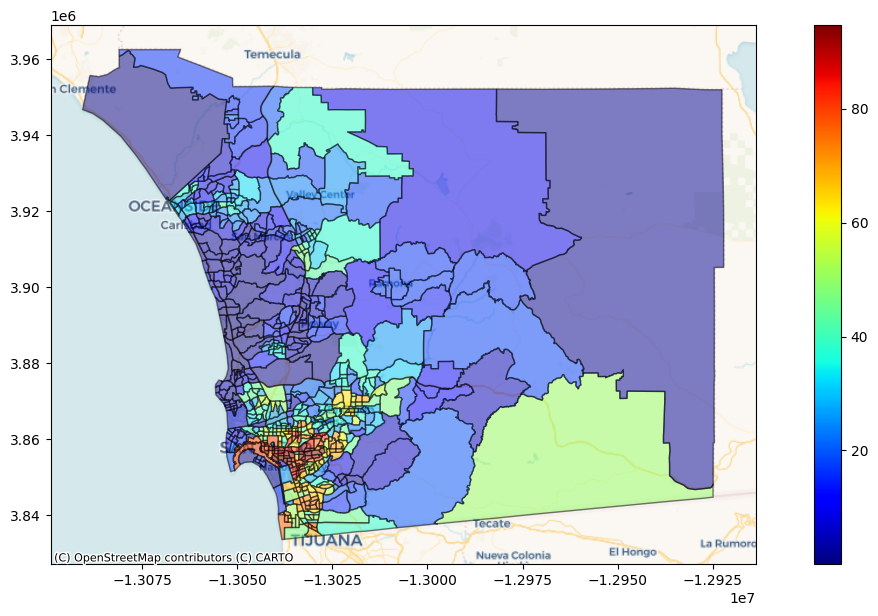

In [52]:
ax = gdf_sd.plot(figsize=(15, 7), alpha=0.5, edgecolor='black', cmap = 'jet', column = "AsthmaP", legend = True)
cx.add_basemap(ax,crs=gdf_sd.crs,source=cx.providers.CartoDB.Voyager)

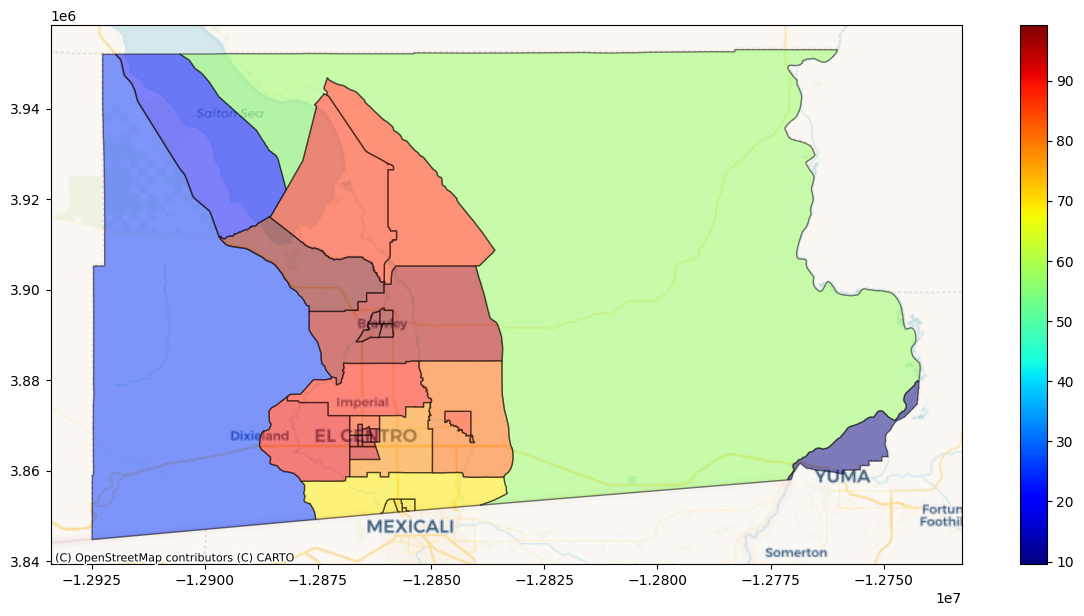

In [53]:
ax = gdf_ll.plot(figsize=(15, 7), alpha=0.5, edgecolor='black', cmap = 'jet', column = "AsthmaP", legend = True)
cx.add_basemap(ax,crs=gdf_ll.crs,source=cx.providers.CartoDB.Voyager)

In [27]:
dfRV.head()

,X,Y,OBJECTID,ManagedCarePlan,SubNetwork,PlanCode,RecordType,NPI,FacilityName,LastName,...,Address2,City,State,ZIP,ZIP_4,Longitude,Latitude,DHCSCountyCode,FIPSCd,County
124140,-117.182382,33.565149,124167,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.548418e+09,VIDYADHAR V UPASANI,UPASANI,...,NaN,MURRIETA,CA,92562.0,NaN,-117.182382,33.565149,33,6065.0,Riverside
124141,-117.183546,33.558070,124168,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.083169e+09,NATALIE A BOLIVAR,Bolivar,...,NaN,MURRIETA,CA,92562.0,NaN,-117.183546,33.558070,33,6065.0,Riverside
147228,-117.331166,33.959576,147255,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.023419e+09,WILLOWBROOKS BEHAVIORAL HEALTH,GLIDDEN,...,NaN,RIVERSIDE,CA,92507.0,NaN,-117.331166,33.959576,33,6065.0,Riverside
148250,-117.182382,33.565149,148277,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.033627e+09,ROMA D PATEL,PATEL,...,NaN,MURRIETA,CA,92562.0,NaN,-117.182382,33.565149,33,6065.0,Riverside
148338,-117.153871,33.545982,148365,Blue Shield of California Promise,Blue Shield of California Promise,167,Provider,1.043397e+09,VISHAL BANTHIA,BANTHIA,...,NaN,MURRIETA,CA,92563.0,NaN,-117.153871,33.545982,33,6065.0,Riverside


In [96]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Internal Medicine') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("InternalMedicine_Molina.html")

# Display the map
m

In [95]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Emergency Medicine') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("EmergencyMedicine_Molina.html")

# Display the map
m

In [97]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Ophthalmology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Ophthalmology_Molina.html")

# Display the map
m

In [98]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Behavior Analyst') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Behavior Analyst_Molina.html")

# Display the map
m

In [99]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Family Medicine') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Family Medicine _Molina.html")

# Display the map
m

In [20]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Optometrist') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Optometrist _Molina.html")

# Display the map
m

In [21]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Pediatrics') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Pediatrics_Molina.html")

# Display the map
m

In [22]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Hospitalist') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Hospitalist_Molina.html")

# Display the map
m

In [23]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Nurse Anesthetist, Certified Registered') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("NurseAnesthetist_Molina.html")

# Display the map
m

In [24]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Radiology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Radiology.html")

# Display the map
m

In [25]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Anesthesiology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Anesthesiology_Molina.html")

# Display the map
m

In [26]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Physical Therapist') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("PhysicalTherapist.html")

# Display the map
m

In [27]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Obstetrics & Gynecology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Obstetrics&Gynecology.html")

# Display the map
m

In [28]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Urology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Urology.html")

# Display the map
m

In [29]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Neurological Surgery') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("NeurologicalSurgery_Molina.html")

# Display the map
m

In [30]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Podiatrist') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Podiatrist_Molina.html")

# Display the map
m

In [31]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Ophthalmology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Ophthalmology_BlueShield.html")

# Display the map
m

In [32]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Anesthesiology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Anesthesiology_BlueShield.html")

# Display the map
m

In [33]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Orthopaedic Surgery') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("OrthopaedicSurgery_BlueShield.html")

# Display the map
m

In [34]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Pediatrics') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Pediatrics_BlueShield.html")

# Display the map
m

In [35]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Urology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Urology_BlueShield.html")

# Display the map
m

In [36]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Neurological Surgery') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("NeurologicalSurgery_BlueShield.html")

# Display the map
m

In [37]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Otolaryngology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Otolaryngology_BlueShield.html")

# Display the map
m

In [38]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Radiology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Radiology_BlueShield.html")

# Display the map
m

In [39]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Obstetrics & Gynecology') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Obstetrics & Gynecology_BlueShield.html")

# Display the map
m

In [40]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Emergency Medicine') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Emergency Medicine_BlueShield.html")

# Display the map
m

In [41]:
df_filtered = dfIV[
    (dfIV['Classification'].str.strip() == 'Internal Medicine') & 
    (dfIV['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

# Group by 'Address', 'Latitude', and 'Longitude' to aggregate unique physician names and classifications
grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique())  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., Imperial Valley)
m = folium.Map(location=[32.784884, -115.551463], zoom_start=12)

# Add markers for each facility with physician and classification information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("InternalMedicine_BlueShield.html")

# Display the map
m

In [ ]:
#NOW CREATE SETS. DOCTORS UNDER MOLINA WHO ARE ALSO NOT AVAILABLE IN IMPERIAL VALLEY. WHETHER OR NOT THEY OFFER TELEHEATH. DO THE SAME FOR BLUE SHIELD

In [44]:
# Step 1: Extract unique classifications from both datasets
iv_classifications = set(dfIV['Classification'].unique())
sd_classifications = set(dfSD['Classification'].unique())

# Step 2: Identify classifications that exist in San Diego but not in Imperial Valley
unique_sd_classifications = sd_classifications - iv_classifications

In [45]:
dfSD_unique = dfSD[dfSD['Classification'].isin(unique_sd_classifications)]

In [47]:
dfSD_unique.to_csv("SanDiego_Only_Classifications.csv", index=False)

In [48]:
unique_telehealth_values = dfSD_unique['Telehealth'].unique()

# Display the result
print(f"Unique values in the 'Telehealth' column: {unique_telehealth_values}")

Unique values in the 'Telehealth' column: ['N' nan 'B' 'O']


In [53]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Acupuncturist') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise') &
(dfSD_unique['Telehealth'].isin(['B', 'O']))
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
    'Telehealth': lambda x: ', '.join(x.unique())  # Combine unique telehealth statuses
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    <b>Telehealth:</b> {row['Telehealth']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
#m.save("Acupuncturists_SD_BlueShield.html")

# Display the map
m

In [58]:
df_MolinaSD = dfSD_unique[
    (dfSD_unique['ManagedCarePlan'] == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN') & 
    (dfSD_unique['Telehealth'].isin(['B', 'O']))
]

# Step 1: Drop duplicates based on 'NPI' and 'Classification' to ensure accurate counts per classification
MOSDunique_physicians = df_MolinaSD.drop_duplicates(subset=['NPI', 'Classification'])

# Step 2: Group by 'Classification' and count unique physicians per classification
MOSDclassification_counts = MOSDunique_physicians['Classification'].value_counts()

# Step 3: Display the classification counts
print(MOSDclassification_counts)

Classification
Pathology                     2
Clinical Neuropsychologist    2
Transplant Surgery            1
Name: count, dtype: int64


In [59]:
df_MolinaSD = dfSD_unique[
    (dfSD_unique['ManagedCarePlan'] == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Step 1: Drop duplicates based on 'NPI' and 'Classification' to ensure accurate counts per classification
MOSDunique_physicians = df_MolinaSD.drop_duplicates(subset=['NPI', 'Classification'])

# Step 2: Group by 'Classification' and count unique physicians per classification
MOSDclassification_counts = MOSDunique_physicians['Classification'].value_counts()

# Step 3: Display the classification counts
print(MOSDclassification_counts)

Classification
Pathology                              47
Acupuncturist                          25
Speech-Language Pathologist            21
Dietitian, Registered                  14
Clinical Neuropsychologist             12
Colon & Rectal Surgery                 11
Transplant Surgery                     10
Neuromusculoskeletal Medicine & OMM     9
Registered Nurse                        4
Hearing Instrument Specialist           4
Massage Therapist                       3
Physical Therapy Assistant              3
Pharmacist                              2
Rehabilitation Hospital                 1
Naturopath                              1
Psychiatric Hospital                    1
Multi-Specialty                         1
Nutritionist                            1
Community/Behavioral Health             1
Long Term Care Hospital                 1
Name: count, dtype: int64


In [ ]:
df_MolinaSD = dfSD_unique[
    (dfSD_unique['ManagedCarePlan'] == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

# Step 1: Drop duplicates based on 'NPI' and 'Classification' to ensure accurate counts per classification
MOSDunique_physicians = df_MolinaSD.drop_duplicates(subset=['NPI', 'Classification'])

# Step 2: Group by 'Classification' and count unique physicians per classification
MOSDclassification_counts = MOSDunique_physicians['Classification'].value_counts()

# Step 3: Display the classification counts
print(MOSDclassification_counts)

In [63]:
df_BSSD = dfSD_unique[
    (dfSD_unique['ManagedCarePlan'] == 'Blue Shield of California Promise')
]

# Step 1: Drop duplicates based on 'NPI' and 'Classification' to ensure accurate counts per classification
BSSDunique_physicians = df_BSSD.drop_duplicates(subset=['NPI', 'Classification'])

# Step 2: Group by 'Classification' and count unique physicians per classification
BSSDclassification_counts = BSSDunique_physicians['Classification'].value_counts()

# Step 3: Display the classification counts
print(BSSDclassification_counts)

Classification
Acupuncturist                          165
Pathology                               56
Speech-Language Pathologist             20
Audiologist-Hearing Aid Fitter           9
Colon & Rectal Surgery                   8
Dietitian, Registered                    5
Neuromusculoskeletal Medicine & OMM      4
Massage Therapist                        3
Pharmacist                               2
Transplant Surgery                       2
Clinical Neuropsychologist               2
Naturopath                               1
Technician/Technologist                  1
Name: count, dtype: int64


In [64]:
df_BSSD = dfSD_unique[
    (dfSD_unique['ManagedCarePlan'] == 'Blue Shield of California Promise') &
    (dfSD_unique['Telehealth'].isin(['B', 'O']))
]

# Step 1: Drop duplicates based on 'NPI' and 'Classification' to ensure accurate counts per classification
BSSDunique_physicians = df_BSSD.drop_duplicates(subset=['NPI', 'Classification'])

# Step 2: Group by 'Classification' and count unique physicians per classification
BSSDclassification_counts = BSSDunique_physicians['Classification'].value_counts()

# Step 3: Display the classification counts
print(BSSDclassification_counts)

Classification
Audiologist-Hearing Aid Fitter    3
Acupuncturist                     2
Speech-Language Pathologist       2
Name: count, dtype: int64


In [66]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Audiologist-Hearing Aid Fitter') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise') &
(dfSD_unique['Telehealth'].isin(['B', 'O']))
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
    'Telehealth': lambda x: ', '.join(x.unique())  # Combine unique telehealth statuses
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    <b>Telehealth:</b> {row['Telehealth']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("HearingAidFitter_SD_TH_BlueShield.html")

# Display the map
m

In [67]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Acupuncturist') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise') &
(dfSD_unique['Telehealth'].isin(['B', 'O']))
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
    'Telehealth': lambda x: ', '.join(x.unique())  # Combine unique telehealth statuses
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    <b>Telehealth:</b> {row['Telehealth']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Acupuncturists_SD_TH_BlueShield.html")

# Display the map
m

In [68]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Speech-Language Pathologist') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise') &
(dfSD_unique['Telehealth'].isin(['B', 'O']))
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
    'Telehealth': lambda x: ', '.join(x.unique())  # Combine unique telehealth statuses
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    <b>Telehealth:</b> {row['Telehealth']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Speech-LanguagePathologist_SD_TH_BlueShield.html")

# Display the map
m

In [69]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Pathology') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Pathology_SD_BlueShield.html")

# Display the map
m

In [70]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Acupuncturist') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Acupuncturist_SD_BlueShield.html")

# Display the map
m

In [72]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Dietitian, Registered') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Dietitian_SD_BlueShield.html")

# Display the map
m

In [73]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Colon & Rectal Surgery') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'Blue Shield of California Promise')
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Colon&RectalSurgery_SD_BlueShield.html")

# Display the map
m

In [74]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Pathology') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Pathology_SD_Molina.html")

# Display the map
m

In [76]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Acupuncturist') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Acupuncturist_SD_Molina.html")

# Display the map
m

In [78]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Dietitian, Registered') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Dietitian_SD_Molina.html")

# Display the map
m

In [79]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Transplant Surgery') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN')
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("TransplantSurgery_SD_Molina.html")

# Display the map
m

In [80]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Pathology') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN') &
    (dfSD_unique['Telehealth'].isin(['B','O']))
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
    'Telehealth': lambda x: ','.join(x.unique())
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    <b>Telehealth:</b> {row['Telehealth']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("Pathology_SD_Molina_TH.html")

# Display the map
m

In [81]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Clinical Neuropsychologist') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN') &
    (dfSD_unique['Telehealth'].isin(['B','O']))
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
    'Telehealth': lambda x: ','.join(x.unique())
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    <b>Telehealth:</b> {row['Telehealth']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("ClinicalNeuropsychologist_SD_Molina_TH.html")

# Display the map
m

In [82]:
df_filtered = dfSD_unique[
    (dfSD_unique['Classification'].str.strip() == 'Transplant Surgery') & 
    (dfSD_unique['ManagedCarePlan'].str.strip() == 'MOLINA HEALTHCARE OF CALIFORNIA PARTNER PLAN') &
    (dfSD_unique['Telehealth'].isin(['B','O']))
]

grouped_facilities = df_filtered.groupby(['Address', 'Latitude', 'Longitude']).agg({
    'FirstName': lambda x: ', '.join(x.unique()),  # Combine unique first names
    'LastName': lambda x: ', '.join(x.unique()),   # Combine unique last names
    'Classification': lambda x: ', '.join(x.unique()),  # Combine unique classifications
    'Telehealth': lambda x: ','.join(x.unique())
}).reset_index()

# Create a new column with the combined unique physician names
grouped_facilities['Physicians'] = grouped_facilities.apply(
    lambda x: ', '.join(f"{fn} {ln}" for fn, ln in zip(x['FirstName'].split(', '), x['LastName'].split(', '))), axis=1
)

# Initialize the map centered around a location (e.g., San Diego)
m = folium.Map(location=[32.7157, -117.1611], zoom_start=10)

# Add markers for each facility with physician, classification, and telehealth information
for index, row in grouped_facilities.iterrows():
    popup_html = f"""
    <b>Address:</b> {row['Address']}<br>
    <b>Classification:</b> {row['Classification']}<br>
    <b>Physicians:</b> {row['Physicians']}<br>
    <b>Telehealth:</b> {row['Telehealth']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Save the map to an HTML file
m.save("TransplantSurgery_SD_Molina_TH.html")

# Display the map
m